# IBM Capstone Project
### Anan Lin

## 1 Prepare the data

In [1]:
# get Tokyo 23 Wards data from wikipedia

import requests
website_url = requests.get("https://en.wikipedia.org/wiki/Special_wards_of_Tokyo").text

In [21]:
#format the data better
#from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url,'lxml') 
Tokyo_table = soup.find('table',{'class':'wikitable sortable'})
import pandas as pd
table_rows = Tokyo_table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
#data formatting
df = pd.DataFrame(data)
df.drop([0],axis=0,inplace = True)
df.drop([24],axis=0,inplace = True)
df.drop([1,3,4,5,6],axis = 1, inplace = True)

In [22]:
df.columns = ['number','Ward','District']
df

,number,Ward,District
1,01,Chiyoda,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
2,02,Chūō,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
3,03,Minato,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
4,04,Shinjuku,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
5,05,Bunkyō,"Hongō, Yayoi, Hakusan"
6,06,Taitō,"Ueno, Asakusa"
7,07,Sumida,"Kinshichō, Morishita, Ryōgoku"
8,08,Kōtō,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
9,09,Shinagawa,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
10,10,Meguro,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [60]:
#pick up the major 2 district for each ward
df1 = pd.concat([df[['number','Ward']], df['District'].str.split(', ', expand=True)], axis=1)

data2 = []
data3 = []
for i in range(len(df1)):
    for j in range(11):
        data2.append([df1.iloc[i,j+2]])
        data3.append([df1.iloc[i,1]])
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df_Tokyo = pd.concat([df3,df2],axis=1)
df_Tokyo.columns = ['Ward','District']
df_Tokyo = df_Tokyo[~df_Tokyo['District'].isnull()] 

In [79]:
df_Tokyo
df_Tokyo.set_index('Ward',inplace = True)

### 2 Get the latitude and longtitude information

In [90]:
len(df_Tokyo)

106

In [84]:
from geopy.geocoders import Nominatim
data4 = []
data5 = []

geolocator = Nominatim(user_agent="Tokyo_explorer")
for k in range(len(df_Tokyo)):
    location = geolocator.geocode(df_Tokyo.iloc[k,0])
    latitude = location.latitude
    longitude = location.longitude
    data4.append(latitude)
    data5.append(longitude)


In [92]:
df_Tokyo['latitude'] = data4
df_Tokyo['longtitude'] = data5

In [96]:
df_Tokyo.reset_index(inplace = True)
df_Tokyo

,Ward,District,latitude,longtitude
0,Chiyoda,Nagatachō,35.675618,139.743469
1,Chiyoda,Kasumigaseki,35.672478,139.752388
2,Chiyoda,Ōtemachi,35.686794,139.766200
3,Chiyoda,Marunouchi,35.204882,136.841895
4,Chiyoda,Akihabara,35.699736,139.771250
5,Chiyoda,Yūrakuchō,35.674423,139.761674
6,Chiyoda,Iidabashi,35.701869,139.745381
7,Chiyoda,Kanda,29.855563,81.298341
8,Chūō,Nihonbashi,35.684058,139.774501
9,Chūō,Kayabachō,35.680229,139.779424


In [94]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 35.6828387, 139.7594549.


In [100]:
!pip -q install folium
import folium 
map_Tokyo = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Tokyo['latitude'], df_Tokyo['longtitude'], df_Tokyo['Ward'],df_Tokyo['District']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Tokyo)  
    
map_Tokyo

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


## 3 Foursquare location data

In [102]:
CLIENT_ID = 'RTJ1RYNNZFTZ13JDAC2VPZQRTBWS3RQQRWAIM220MT1SHSHL' 
CLIENT_SECRET = 'VED3XCUICY1MJKD0WTNMQTSRSXLP5JTGRDFBOJVN5KUKCJ5I' 
VERSION = '20190701' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RTJ1RYNNZFTZ13JDAC2VPZQRTBWS3RQQRWAIM220MT1SHSHL
CLIENT_SECRET:VED3XCUICY1MJKD0WTNMQTSRSXLP5JTGRDFBOJVN5KUKCJ5I


In [103]:
LIMIT = 100
radius = 500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [104]:
Tokyo_venues = getNearbyVenues(names=df_Tokyo['District'],
                                   latitudes=df_Tokyo['latitude'],
                                   longitudes=df_Tokyo['longtitude']
                                  )

Nagatachō
Kasumigaseki
Ōtemachi
Marunouchi
Akihabara
Yūrakuchō
Iidabashi
Kanda
Nihonbashi
Kayabachō
Ginza
Tsukiji
Hatchōbori
Shinkawa
Tsukishima
Kachidoki
Tsukuda
Odaiba
Shinbashi
Hamamatsuchō
Mita
Roppongi
Toranomon
Aoyama
Azabu
Shinjuku
Takadanobaba
Ōkubo
Kagurazaka
Ichigaya
Yotsuya
Hongō
Yayoi
Hakusan
Ueno
Asakusa
Kinshichō
Morishita
Ryōgoku
Kiba
Ariake
Kameido
Tōyōchō
Monzennakachō
Fukagawa
Kiyosumi
Shirakawa
Etchūjima
Sunamachi
Aomi
Shinagawa
Gotanda
Ōsaki
Hatanodai
Ōimachi
Tennōzu
Meguro
Nakameguro
Jiyugaoka
Komaba
Aobadai
Ōmori
Kamata
Haneda
Den-en-chōfu
Setagaya
Shimokitazawa
Kinuta
Karasuyama
Tamagawa
Shibuya
Ebisu
Harajuku
Daikanyama
Hiroo
Sendagaya
Yoyogi
Nakano
Kōenji
Asagaya
Ogikubo
Ikebukuro
Komagome
Senkawa
Sugamo
Akabane
Ōji
Tabata
Arakawa
Machiya
Nippori
Minamisenju
Itabashi
Takashimadaira
Nerima
Ōizumi
Hikarigaoka
Ayase
Kitasenju
Takenotsuka
Tateishi
Aoto
Kameari
Shibamata
Kasai
Koiwa


In [144]:
High_Frequency = Tokyo_venues.groupby('Venue Category').count()
High_Frequency = High_Frequency.sort_values(by = ['Neighborhood'],ascending = False)
High_Frequency.head(20).index

Index(['Convenience Store', 'Japanese Restaurant', 'Ramen Restaurant',
       'Sake Bar', 'Café', 'Coffee Shop', 'BBQ Joint', 'Chinese Restaurant',
       'Italian Restaurant', 'Soba Restaurant', 'Bar', 'Sushi Restaurant',
       'Bakery', 'Park', 'Donburi Restaurant', 'Steakhouse',
       'Japanese Curry Restaurant', 'Yakitori Restaurant', 'Hotel',
       'Seafood Restaurant'],
      dtype='object', name='Venue Category')

In [151]:
Target = ['Café', 'Coffee','Tea','Dessert','Bakery']
Tokyo_coffee = pd.DataFrame()
for each in Target:
    info = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains(each)]
    Tokyo_coffee=pd.concat([Tokyo_coffee,info])

In [152]:
Tokyo_coffee

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,Nagatachō,35.675618,139.743469,フェリカ,35.679126,139.744411,Café
35,Kasumigaseki,35.672478,139.752388,PRONTO Library Shop & Cafe (PRONTO ライブラリーショップ&...,35.671814,139.754179,Café
43,Kasumigaseki,35.672478,139.752388,illy bar,35.670485,139.751497,Café
132,Ōtemachi,35.686794,139.766200,The Cafe by AMAN,35.685593,139.765447,Café
146,Ōtemachi,35.686794,139.766200,玄米カフェ 実身美 大手町店,35.685149,139.763645,Café
151,Ōtemachi,35.686794,139.766200,cafe1869 by MARUZEN,35.683544,139.766752,Café
160,Ōtemachi,35.686794,139.766200,Machimura Farm (町村農場),35.683013,139.764090,Café
161,Ōtemachi,35.686794,139.766200,DEAN & DELUCA,35.683545,139.764230,Café
183,Ōtemachi,35.686794,139.766200,Tante Marie,35.683305,139.766688,Café
219,Ōtemachi,35.686794,139.766200,Tokyo Oven (東京オーブン),35.690453,139.767756,Café


## 4 Type of the shop

In [153]:
import matplotlib as mlt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [170]:
High_Freq = Tokyo_coffee.groupby('Venue Category').count()
High_Freq = High_Freq.sort_values(by = ['Neighborhood'],ascending = False)
High_Freq.reset_index(inplace = True)
High_Freq

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Café,252,252,252,252,252,252
1,Coffee Shop,193,193,193,193,193,193
2,Bakery,70,70,70,70,70,70
3,Dessert Shop,49,49,49,49,49,49
4,Tea Room,26,26,26,26,26,26
5,Pet Café,7,7,7,7,7,7
6,Bubble Tea Shop,6,6,6,6,6,6


(array([ 1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

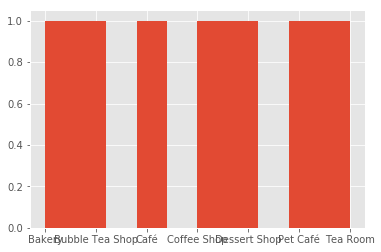

In [171]:
plt.hist(High_Freq['Venue Category'])



## 5 Location of the shop

In [176]:
High_Freq2 = Tokyo_coffee.groupby('Neighborhood').count()
High_Freq2 = High_Freq2.sort_values(by = ['Venue Category'],ascending = False)
High_Freq2.reset_index(inplace = True)
High_Freq2.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jiyugaoka,28,28,28,28,28,28
1,Shimokitazawa,20,20,20,20,20,20
2,Harajuku,19,19,19,19,19,19
3,Ginza,19,19,19,19,19,19
4,Daikanyama,19,19,19,19,19,19
5,Akihabara,17,17,17,17,17,17
6,Shibuya,16,16,16,16,16,16
7,Ikebukuro,15,15,15,15,15,15
8,Yūrakuchō,15,15,15,15,15,15
9,Ogikubo,14,14,14,14,14,14
